Try the XGBoost model

In [41]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
################################################################
# Hyperparameters
_learning_rate = 0.1
_max_depth = 30

2023-01-11 16:56:19,390 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-11 16:56:19,394 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


In [42]:
def time_taken(t):
    training_time = time.time() - t
    logging.info(f"train time: {training_time}" )

In [43]:
df_y = df_labels[gl.edInput].to_frame()
# For xgboost the labels need to be 1 or 0. 
# Currently they are 2 or 1, so subtract 1 to get eh right values
df_y = df_y.apply(lambda x: x - 1)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [44]:
t = time.time()
classifier = XGBClassifier(objective= 'binary:logistic', learning_rate = _learning_rate, max_depth=_max_depth, seed=42)
classifier.fit(X_train, y_train)
time_taken(t)

2023-01-11 16:56:32,202 | INFO : train time: 12.472172498703003


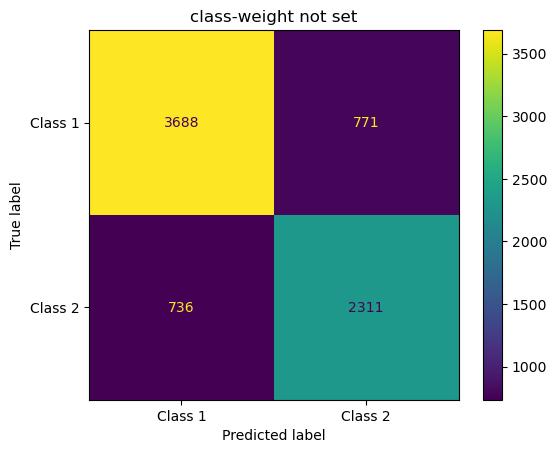

              precision    recall  f1-score   support

     Class 1       0.83      0.83      0.83      4459
     Class 2       0.75      0.76      0.75      3047

    accuracy                           0.80      7506
   macro avg       0.79      0.79      0.79      7506
weighted avg       0.80      0.80      0.80      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.58.


In [45]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

2023-01-11 16:56:32,564 | INFO : Calculating for Bigram...
2023-01-11 16:56:32,565 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
2023-01-11 16:56:46,058 | INFO : train time: 13.378173112869263
2023-01-11 16:56:46,138 | INFO : Results for Bigram.


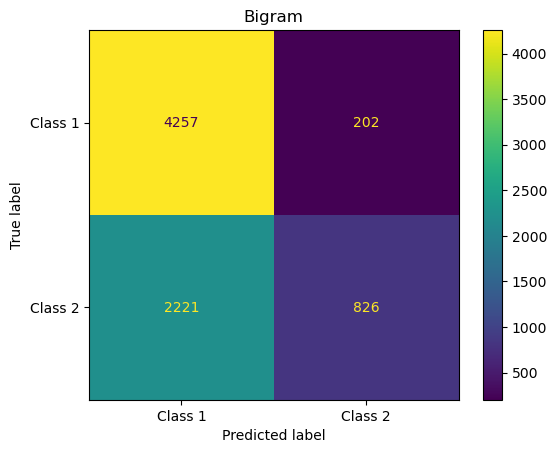

              precision    recall  f1-score   support

     Class 1       0.66      0.95      0.78      4459
     Class 2       0.80      0.27      0.41      3047

    accuracy                           0.68      7506
   macro avg       0.73      0.61      0.59      7506
weighted avg       0.72      0.68      0.63      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.32.
2023-01-11 16:56:46,331 | INFO : Calculating for Trigram...
2023-01-11 16:56:46,333 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
2023-01-11 16:56:58,608 | INFO : train time: 12.166443109512329
2023-01-11 16:56:58,688 | INFO : Results for Trigram.


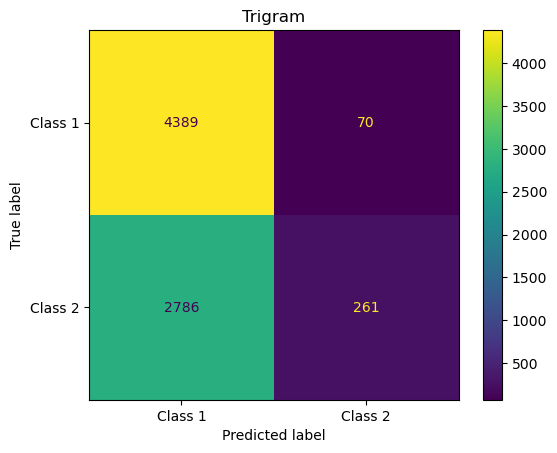

              precision    recall  f1-score   support

     Class 1       0.61      0.98      0.75      4459
     Class 2       0.79      0.09      0.15      3047

    accuracy                           0.62      7506
   macro avg       0.70      0.53      0.45      7506
weighted avg       0.68      0.62      0.51      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.17.
2023-01-11 16:56:58,876 | INFO : Calculating for Stemming...
2023-01-11 16:56:58,878 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
2023-01-11 16:57:10,678 | INFO : train time: 11.691713809967041
2023-01-11 16:57:10,729 | INFO : Results for Stemming.


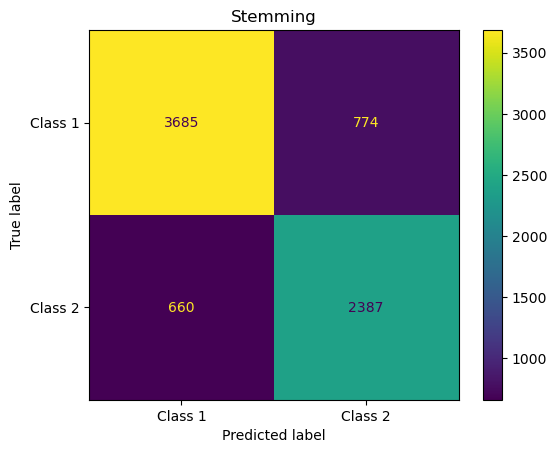

              precision    recall  f1-score   support

     Class 1       0.85      0.83      0.84      4459
     Class 2       0.76      0.78      0.77      3047

    accuracy                           0.81      7506
   macro avg       0.80      0.80      0.80      7506
weighted avg       0.81      0.81      0.81      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.61.
2023-01-11 16:57:10,919 | INFO : Calculating for Lemmatization...
2023-01-11 16:57:10,919 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
2023-01-11 16:57:22,839 | INFO : train time: 11.81236481666565
2023-01-11 16:57:22,916 | INFO : Results for Lemmatization.


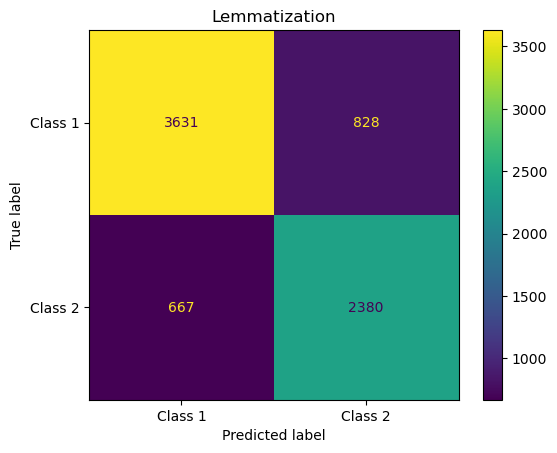

              precision    recall  f1-score   support

     Class 1       0.84      0.81      0.83      4459
     Class 2       0.74      0.78      0.76      3047

    accuracy                           0.80      7506
   macro avg       0.79      0.80      0.80      7506
weighted avg       0.80      0.80      0.80      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.59.
2023-01-11 16:57:23,140 | INFO : Script completed for XgBoost


In [46]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = XGBClassifier(objective= 'binary:logistic', learning_rate = _learning_rate, max_depth=_max_depth, seed=42)
    classifier.fit(X_train, y_train)
    time_taken(t)
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)
    
logging.info("Script completed for XgBoost")

In [47]:
do_not_run = True
if do_not_run:
    t = time.time()
    _scoring = "f1"
    params = {
        'max_depth': [20, 30, 40],
        'learning_rate': [0.1, 0.01, 0.05]
    }
    grid_search = GridSearchCV(XGBClassifier(objective= 'binary:logistic', seed=42),
        param_grid=params,
        scoring = _scoring,
        verbose=4
    )
    grid_search.fit(X_train, y_train)
    time_taken(t)
    grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...learning_rate=0.1, max_depth=20;, score=0.756 total time=   6.8s
[CV 2/5] END ...learning_rate=0.1, max_depth=20;, score=0.746 total time=   6.5s
[CV 3/5] END ...learning_rate=0.1, max_depth=20;, score=0.763 total time=   6.4s
[CV 4/5] END ...learning_rate=0.1, max_depth=20;, score=0.765 total time=   6.4s
[CV 5/5] END ...learning_rate=0.1, max_depth=20;, score=0.747 total time=   6.4s
[CV 1/5] END ...learning_rate=0.1, max_depth=30;, score=0.768 total time=   9.4s
[CV 2/5] END ...learning_rate=0.1, max_depth=30;, score=0.756 total time=   9.4s
[CV 3/5] END ...learning_rate=0.1, max_depth=30;, score=0.772 total time=   9.3s
[CV 4/5] END ...learning_rate=0.1, max_depth=30;, score=0.767 total time=   9.6s
[CV 5/5] END ...learning_rate=0.1, max_depth=30;, score=0.759 total time=   9.1s
[CV 1/5] END ...learning_rate=0.1, max_depth=40;, score=0.769 total time=  11.7s
[CV 2/5] END ...learning_rate=0.1, max_depth=40;,

In [48]:
if do_not_run:
    grid_search.best_params_

Expected better results from XGBoost, although there are a lot of hyperparameters I have not tuned.<br>
Where the recall scores are good for Bigrams and Trigrams, the F1 scores are poor.<br>